# PySOQCS Example 1: Elementary example program.

Elementary example of SOQCS for a simple circuit with only one beamsplitter.

Structure:

    - Configure SOQCS (maximum number of photons).
    - Create a circuit.
    - Create bunch of photons for that circuit.
    - Attach those photons as the input of the circuit.
    - Build the circuit.
    - Create a simulator to run it.
    - Run the simulation.
    - Print the output probabilities.

# Import  and configure library

In [1]:
import pysoqcs as soqcs

Configure the maximum number of photons in the simulation.

In [2]:
soqcs.cfg_soqcs(2)

# Managing photons

Create and build a circuit, including the photons to be sent to that circuit.

In [3]:
# Create circuit
example = soqcs.qocircuit(2);
# Create photons
photons = soqcs.ph_bunch(example.num_levels(),1)
# Send photons to circuit
photons.add_photons(2,1,example)
photons.send2circuit('G',0,example)
# Build circuit
example.beamsplitter(0,1,45.0,0.0)
example.detector(0)
example.detector(1)

Create a simulator and run the simulation.

In [4]:
simulator=soqcs.simulator()
outcome=simulator.run(photons,example)

Print outcome. 

<b>Known issue</b>: Sometimes it does not print one of the lines that later on it is appended at the next output.

In [5]:
outcome.prnt_bins(example,0.0,False)

 0 :  | 2, 0 >: 0.25
 1 :  | 1, 1 >: 0.5
 2 :  | 0, 2 >: 0.25


Plot outcome

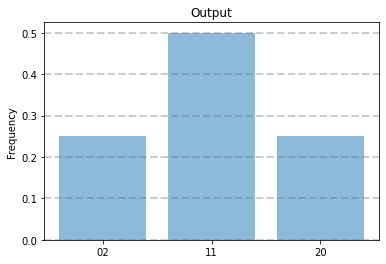

In [6]:
outcome.show()

# Managing states

Create a circuit.

In [7]:
# Create a circuit
example = soqcs.qocircuit(2);
# Build circuit
example.beamsplitter(0,1,45.0,0.0)
example.detector(0)
example.detector(1)

Create and initialize the input state

In [8]:
# Create input state
inputst = soqcs.state(example.num_levels(),10)

# Initialize input state
term=[[0,1], # Channels
      [0,2]] # Occupations
inputst.add_term(1.0,term,example)

Calculate the output state from the input.

In [9]:
simulator=soqcs.simulator()
outputst=simulator.run_state(inputst,example)

Print output state.

In [10]:
outputst.prnt_state(example,False,0)

(0.5,0) *  | 2, 0 > + (-0.707107,0) *  | 1, 1 > + (0.5,0) *  | 0, 2 >


<b> THIS CODE IS PART OF SOQCS </p>
<b>Copyright:</b>
Copyright © 2022 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>
